# Checkpoint 3

## Carregar módulos

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [30]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [31]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [32]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,119486,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12771,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24300,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2781,2785,2791,2800,2812,2824,2830,2833,2843,2852,2857,2865,2910,2928,2942,2962,2985,2995,3030,3090,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,279753,280741,282270,284280,286028,287680,289120,290259,290972,292052,293466,294550,295601,296462,296462,297638,298203,298921,299736,300387,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5770,5812,5858,5918,5960,6020,6056,6105,6137,6183,6220,6263,6294,6317,6325,6341,6363,6390,6414,6426,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90844,90918,90942,91042,91119,91189,91251,91317

## Ajustes



- Nomes das colunas

In [33]:
dados_paises_covid.rename(columns={"Province/State": "province", 
                                   "Country/Region": "country"}, 
                          inplace=True)

In [34]:
dados_paises_covid_dead.rename(columns={"Province/State": "province", 
                                        "Country/Region": "country"}, 
                               inplace=True)

In [35]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/17/21', '5/18/21', '5/19/21', '5/20/21', '5/21/21', '5/22/21',
       '5/23/21', '5/24/21', '5/25/21', '5/26/21'],
      dtype='object', length=495)

- Reajustar dados

In [36]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                             var_name = 'date', 
                                             value_name = 'infected')

In [37]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                                       var_name = 'date', 
                                                       value_name = 'dead')

In [38]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
135020,NaN,Vietnam,14.058324,108.277199,5/26/21,45
135021,NaN,West Bank and Gaza,31.952200,35.233200,5/26/21,3483
135022,NaN,Yemen,15.552727,48.516388,5/26/21,1313
135023,NaN,Zambia,-13.133897,27.849332,5/26/21,1273
135024,NaN,Zimbabwe,-19.015438,29.154857,5/26/21,1589


In [39]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [40]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'], 
                                            infer_datetime_format='True')

In [41]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], 
                                                 infer_datetime_format='True')

In [42]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
135020,NaN,Vietnam,14.058324,108.277199,2021-05-26,6086
135021,NaN,West Bank and Gaza,31.952200,35.233200,2021-05-26,306795
135022,NaN,Yemen,15.552727,48.516388,2021-05-26,6688
135023,NaN,Zambia,-13.133897,27.849332,2021-05-26,93627
135024,NaN,Zimbabwe,-19.015438,29.154857,2021-05-26,38819


In [43]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
135020,NaN,Vietnam,14.058324,108.277199,2021-05-26,45
135021,NaN,West Bank and Gaza,31.952200,35.233200,2021-05-26,3483
135022,NaN,Yemen,15.552727,48.516388,2021-05-26,1313
135023,NaN,Zambia,-13.133897,27.849332,2021-05-26,1273
135024,NaN,Zimbabwe,-19.015438,29.154857,2021-05-26,1589


In [44]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [45]:
dados_paises_covid.shape

(135025, 6)

In [46]:
dados_paises_covid_dead.shape

(135025, 6)

In [47]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead, 
                       on = ['province', 'country',	'Lat',	'Long',	'date'], 
                       how = 'inner')

In [48]:
dados_covid.tail()

,province,country,Lat,Long,date,infected,dead
135020,NaN,Vietnam,14.058324,108.277199,2021-05-26,6086,45
135021,NaN,West Bank and Gaza,31.952200,35.233200,2021-05-26,306795,3483
135022,NaN,Yemen,15.552727,48.516388,2021-05-26,6688,1313
135023,NaN,Zambia,-13.133897,27.849332,2021-05-26,93627,1273
135024,NaN,Zimbabwe,-19.015438,29.154857,2021-05-26,38819,1589


In [49]:
dados_covid.shape

(135025, 7)

## Aqui começa o trabalho

- # Bruno Biancchi – RM 84351
# Douglas Andrade Santos Filho - 87004
# Luis Henrique Caldas Altero – RM 88670
# Pedro Guilherme Polloni Barreto - RM 88964
# Victor Lamprecht Di Roberto – RM 86691

# Exercico 1 – Agrupar a soma de infectados e mortes de todos os países por data.

In [50]:
df_group = dados_covid.groupby(['country', 'date']).agg(infected = pd.NamedAgg('infected', 'sum'), dead = pd.NamedAgg('dead', 'sum')).reset_index()
df_group

,country,date,infected,dead
0,Afghanistan,2020-01-22,0,0
1,Afghanistan,2020-01-23,0,0
2,Afghanistan,2020-01-24,0,0
3,Afghanistan,2020-01-25,0,0
4,Afghanistan,2020-01-26,0,0
...,...,...,...,...
94267,Zimbabwe,2021-05-22,38679,1586
94268,Zimbabwe,2021-05-23,38682,1586
94269,Zimbabwe,2021-05-24,38696,1586
94270,Zimbabwe,2021-05-25,38706,1587


# Exercicio 2 – Criar duas colunas contendo a variação bruta diária de infectados e mortos.

In [51]:
df_group[['diff_infected', 'diff_dead']] = df_group.groupby('country')[['infected', 'dead']].diff()
df_group

,country,date,infected,dead,diff_infected,diff_dead
0,Afghanistan,2020-01-22,0,0,NaN,NaN
1,Afghanistan,2020-01-23,0,0,0.0,0.0
2,Afghanistan,2020-01-24,0,0,0.0,0.0
3,Afghanistan,2020-01-25,0,0,0.0,0.0
4,Afghanistan,2020-01-26,0,0,0.0,0.0
...,...,...,...,...,...,...
94267,Zimbabwe,2021-05-22,38679,1586,15.0,0.0
94268,Zimbabwe,2021-05-23,38682,1586,3.0,0.0
94269,Zimbabwe,2021-05-24,38696,1586,14.0,0.0
94270,Zimbabwe,2021-05-25,38706,1587,10.0,1.0


# Exercicio 3 – Criar duas colunas contendo a variação percentual diária de infectados e mortos.

In [52]:
df_group[['pct_diff_infected', 'pct_diff_dead']] = df_group.groupby('country')[['infected', 'dead']].pct_change()
df_group

,country,date,infected,dead,diff_infected,diff_dead,pct_diff_infected,pct_diff_dead
0,Afghanistan,2020-01-22,0,0,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-23,0,0,0.0,0.0,NaN,NaN
2,Afghanistan,2020-01-24,0,0,0.0,0.0,NaN,NaN
3,Afghanistan,2020-01-25,0,0,0.0,0.0,NaN,NaN
4,Afghanistan,2020-01-26,0,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
94267,Zimbabwe,2021-05-22,38679,1586,15.0,0.0,0.000388,0.000000
94268,Zimbabwe,2021-05-23,38682,1586,3.0,0.0,0.000078,0.000000
94269,Zimbabwe,2021-05-24,38696,1586,14.0,0.0,0.000362,0.000000
94270,Zimbabwe,2021-05-25,38706,1587,10.0,1.0,0.000258,0.000631


# Exercicio 4 – Filtrar os países: Brasil, Estados Unidos, Itália e Canadá.

In [53]:
pd.set_option('use_inf_as_na', True)
df_group = df_group.fillna(0)

In [54]:
df_group_paises = df_group[df_group['country'].isin(['Brazil', 'US','Italy', 'Canada'])].reset_index()
df_group_paises

,index,country,date,infected,dead,diff_infected,diff_dead,pct_diff_infected,pct_diff_dead
0,11293,Brazil,2020-01-22,0,0,0.0,0.0,0.000000,0.000000
1,11294,Brazil,2020-01-23,0,0,0.0,0.0,0.000000,0.000000
2,11295,Brazil,2020-01-24,0,0,0.0,0.0,0.000000,0.000000
3,11296,Brazil,2020-01-25,0,0,0.0,0.0,0.000000,0.000000
4,11297,Brazil,2020-01-26,0,0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1959,87884,US,2021-05-22,33104884,589703,19778.0,480.0,0.000598,0.000815
1960,87885,US,2021-05-23,33117737,589893,12853.0,190.0,0.000388,0.000322
1961,87886,US,2021-05-24,33143662,590320,25925.0,427.0,0.000783,0.000724
1962,87887,US,2021-05-25,33166418,590941,22756.0,621.0,0.000687,0.001052


# Exercicio 5  – Obter a média mensal da variação bruta de infectados e mortos para cada país. Descreva os resultados.

In [65]:
df_group_paises['year_month'] = df_group_paises['date'].dt.to_period('M')
df_group_paises_media = df_group_paises.groupby(['country', 'year_month']).agg(diff_infected = pd.NamedAgg('diff_infected', 'mean'), diff_dead = pd.NamedAgg('diff_dead', 'mean')).reset_index()
df_group_paises_media

,country,year_month,diff_infected,diff_dead
0,Brazil,2020-01,0.000000,0.000000
1,Brazil,2020-02,0.068966,0.000000
2,Brazil,2020-03,184.354839,6.483871
3,Brazil,2020-04,2715.666667,193.500000
4,Brazil,2020-05,13795.548387,751.870968
...,...,...,...,...
63,US,2021-01,198312.580645,3138.225806
64,US,2021-02,85774.678571,2344.142857
65,US,2021-03,58498.903226,1212.161290
66,US,2021-04,62825.366667,791.200000


- Resposta exercício 5:
No Brasil e na Itália tiveram 2 picos de contaminação (Brasil 06/2020 - 09/2020 e depois 01/2021 até o presente momento, e Itália 11/2020 e depois 03/2021). E no EUA teve apenas um pico de contaminação (EUA 11/2020 até 02/2021).

# Exercicio 6 – Obter a média mensal da variação percentual de infectados e mortos para cada país.

In [66]:
df_group_paises_pct_media = df_group_paises.groupby(['country', 'year_month']).agg(pct_diff_infected = pd.NamedAgg('pct_diff_infected', 'mean'), pct_diff_dead = pd.NamedAgg('pct_diff_dead', 'mean')).reset_index()
df_group_paises_pct_media

,country,year_month,pct_diff_infected,pct_diff_dead
0,Brazil,2020-01,0.000000,0.000000
1,Brazil,2020-02,0.034483,0.000000
2,Brazil,2020-03,0.355338,0.233035
3,Brazil,2020-04,0.095684,0.121676
4,Brazil,2020-05,0.059062,0.052595
...,...,...,...,...
63,US,2021-01,0.008649,0.007903
64,US,2021-02,0.003132,0.004882
65,US,2021-03,0.001982,0.002274
66,US,2021-04,0.002003,0.001403


- Resposta exercício 6:
Apos os primeiros 4 meses, a media do percentual de mortes mensal teve um declinio exponencial, mantendo-se baixa nos 3 paises.

# Exercicio 7 – Gerar os seguintes gráficos:

# a) Gráfico de barras contendo a evolução média mensal da variação BRUTA de infectados para Brasil. E.U.A e Itália (Um gráfico para cada país separadamente)

In [57]:
df_br = df_group_paises_media[df_group_paises_media['country'] == 'Brazil']
df_us = df_group_paises_media[df_group_paises_media['country'] == 'US']
df_it = df_group_paises_media[df_group_paises_media['country'] == 'Italy']

- Gráfico Brasil

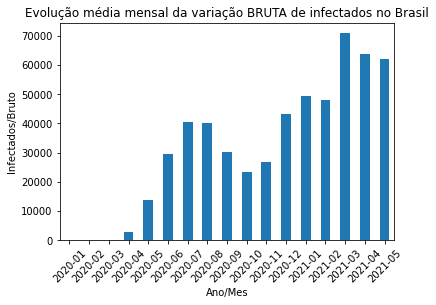

In [58]:
ax = df_br.plot.bar(x = 'year_month', y = 'diff_infected', legend=None)
plt.xlabel('Ano/Mes')
plt.ylabel('Infectados/Bruto')
plt.title('Evolução média mensal da variação BRUTA de infectados no Brasil')
plt.xticks(rotation=45)
plt.show()

- Gráfico US

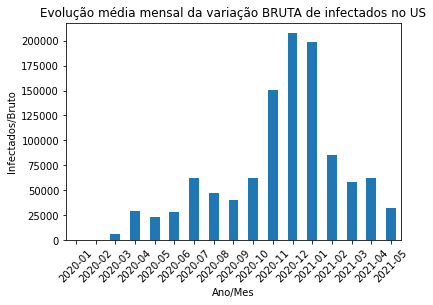

In [59]:
ax = df_us.plot.bar(x = 'year_month', y = 'diff_infected', legend=None)
plt.xlabel('Ano/Mes')
plt.ylabel('Infectados/Bruto')
plt.title('Evolução média mensal da variação BRUTA de infectados no US')
plt.xticks(rotation=45)
plt.show()

- Gráfico Itália

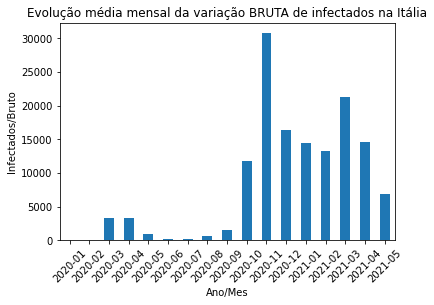

In [60]:
ax = df_it.plot.bar(x = 'year_month', y = 'diff_infected', legend=None)
plt.xlabel('Ano/Mes')
plt.ylabel('Infectados/Bruto')
plt.title('Evolução média mensal da variação BRUTA de infectados na Itália')
plt.xticks(rotation=45)
plt.show()

# b) Gráfico de linhas contendo a evolução média mensal da variação PERCENTUAL de mortes para Brasil. E.U.A e Itália (Um gráfico para cada país separadamente)

In [61]:
df_br_pct = df_group_paises_pct_media[df_group_paises_pct_media['country'] == 'Brazil']
df_us_pct = df_group_paises_pct_media[df_group_paises_pct_media['country'] == 'US']
df_it_pct = df_group_paises_pct_media[df_group_paises_pct_media['country'] == 'Italy']

- Gráfico Brasil

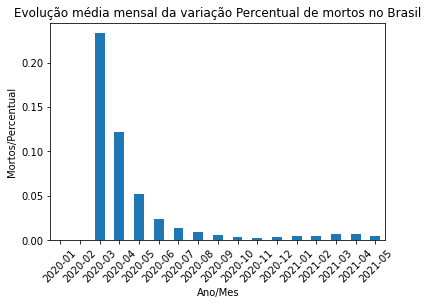

In [62]:
ax = df_br_pct.plot.bar(x = 'year_month', y = 'pct_diff_dead', legend=None)
plt.xlabel('Ano/Mes')
plt.ylabel('Mortos/Percentual')
plt.title('Evolução média mensal da variação Percentual de mortos no Brasil')
plt.xticks(rotation=45)
plt.show()

- Gráfico US

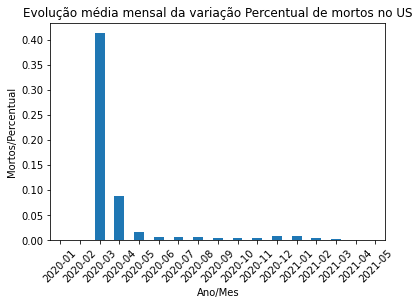

In [63]:
ax = df_us_pct.plot.bar(x = 'year_month', y = 'pct_diff_dead', legend=None)
plt.xlabel('Ano/Mes')
plt.ylabel('Mortos/Percentual')
plt.title('Evolução média mensal da variação Percentual de mortos no US')
plt.xticks(rotation=45)
plt.show()

- Gráfico Itália

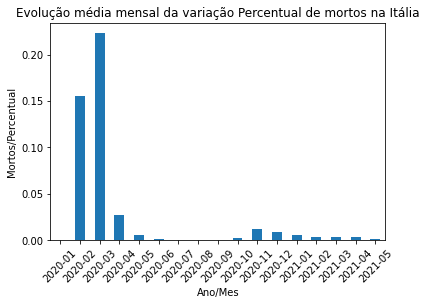

In [64]:
ax = df_it_pct.plot.bar(x = 'year_month', y = 'pct_diff_dead', legend=None)
plt.xlabel('Ano/Mes')
plt.ylabel('Mortos/Percentual')
plt.title('Evolução média mensal da variação Percentual de mortos na Itália')
plt.xticks(rotation=45)
plt.show()